In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.3)

In [2]:
import sys
sys.version

'3.9.4 (default, Apr  9 2021, 11:43:21) [MSC v.1916 64 bit (AMD64)]'

In [3]:
df = pd.read_csv("raw_data.csv")
print(df.head())
print(len(df))

         key  value                 user
0  yuaku.png      2 -5785923211323718779
1  wbyzz.png      3 -5785923211323718779
2  diukc.png      2 -5785923211323718779
3  gnoij.png      1 -5785923211323718779
4  nohcv.png      5 -5785923211323718779
1914


In [4]:
df['predicted'] = pd.to_numeric(df.value)

In [5]:
mapping = {'img0_blue_8.png': 'sfrxq.png', 'img0_original_8.png': 'jgaxu.png', 'img10_blue_9.png': 'ybbjw.png', 'img10_original_9.png': 'vgfwg.png', 'img11_blue_12.png': 'strdd.png', 'img11_original_12.png': 'qzubf.png', 'img12_blue_6.png': 'gnoij.png', 'img12_original_6.png': 'xwtuu.png', 'img13_blue_10.png': 'nohcv.png', 'img13_original_10.png': 'diukc.png', 'img14_blue_5.png': 'hkshk.png', 'img14_original_5.png': 'yuaku.png', 'img1_blue_3.png': 'rftjn.png', 'img1_original_3.png': 'wwjkt.png', 'img2_blue_7.png': 'dnocu.png', 'img2_original_7.png': 'wbyzz.png', 'img3_blue_8.png': 'mepqp.png', 'img3_original_8.png': 'mregu.png', 'img4_blue_7.png': 'pofzm.png', 'img4_original_7.png': 'crelm.png', 'img5_blue_12.png': 'frofx.png', 'img5_original_12.png': 'tuliw.png', 'img6_blue_13.png': 'fsgtc.png', 'img6_original_13.png': 'zlltm.png', 'img7_blue_8.png': 'mcbvs.png', 'img7_original_8.png': 'nkebh.png', 'img8_blue_4.png': 'wdfpk.png', 'img8_original_4.png': 'msqxw.png', 'img9_blue_5.png': 'sbstp.png', 'img9_original_5.png': 'vxlcq.png'}

In [6]:
reverse_mapping = dict(((value, key) for key, value in mapping.items()))

In [7]:
df['picture'] = df.apply(lambda x: reverse_mapping[x['key']], axis=1)

In [8]:
df = df.filter(['user', 'picture', 'predicted'])

In [9]:
def parse_name(name: pd.Series) -> (str, bool, int):
    name = name['picture'].removesuffix('.png').split("_")
    return name[0], name[1] == 'blue', int(name[2])

In [10]:
df[['picture', 'our_solution', 'true_objects']] = df.apply(parse_name, axis=1, result_type='expand')

In [11]:
df = df[df.predicted < 20]

In [12]:
df['absolute_error'] = abs(df['true_objects'] - df['predicted'])

In [13]:
print(len(df[df.our_solution == True]), len(df[df.our_solution != True]))

985 923


In [14]:
df.head()

,user,picture,predicted,our_solution,true_objects,absolute_error
0,-5785923211323718779,img14,2,False,5,3
1,-5785923211323718779,img2,3,False,7,4
2,-5785923211323718779,img13,2,False,10,8
3,-5785923211323718779,img12,1,True,6,5
4,-5785923211323718779,img13,5,True,10,5


<AxesSubplot:xlabel='absolute_error', ylabel='Count'>

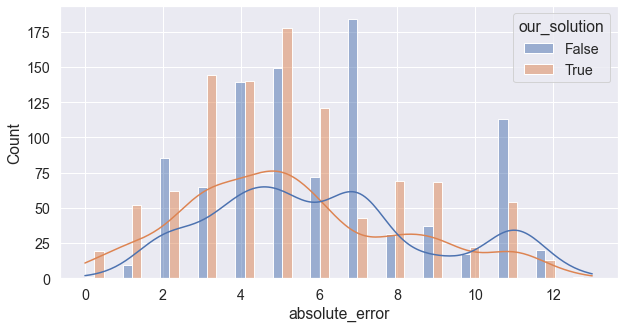

In [15]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='absolute_error', hue='our_solution', kde=True, multiple='dodge')

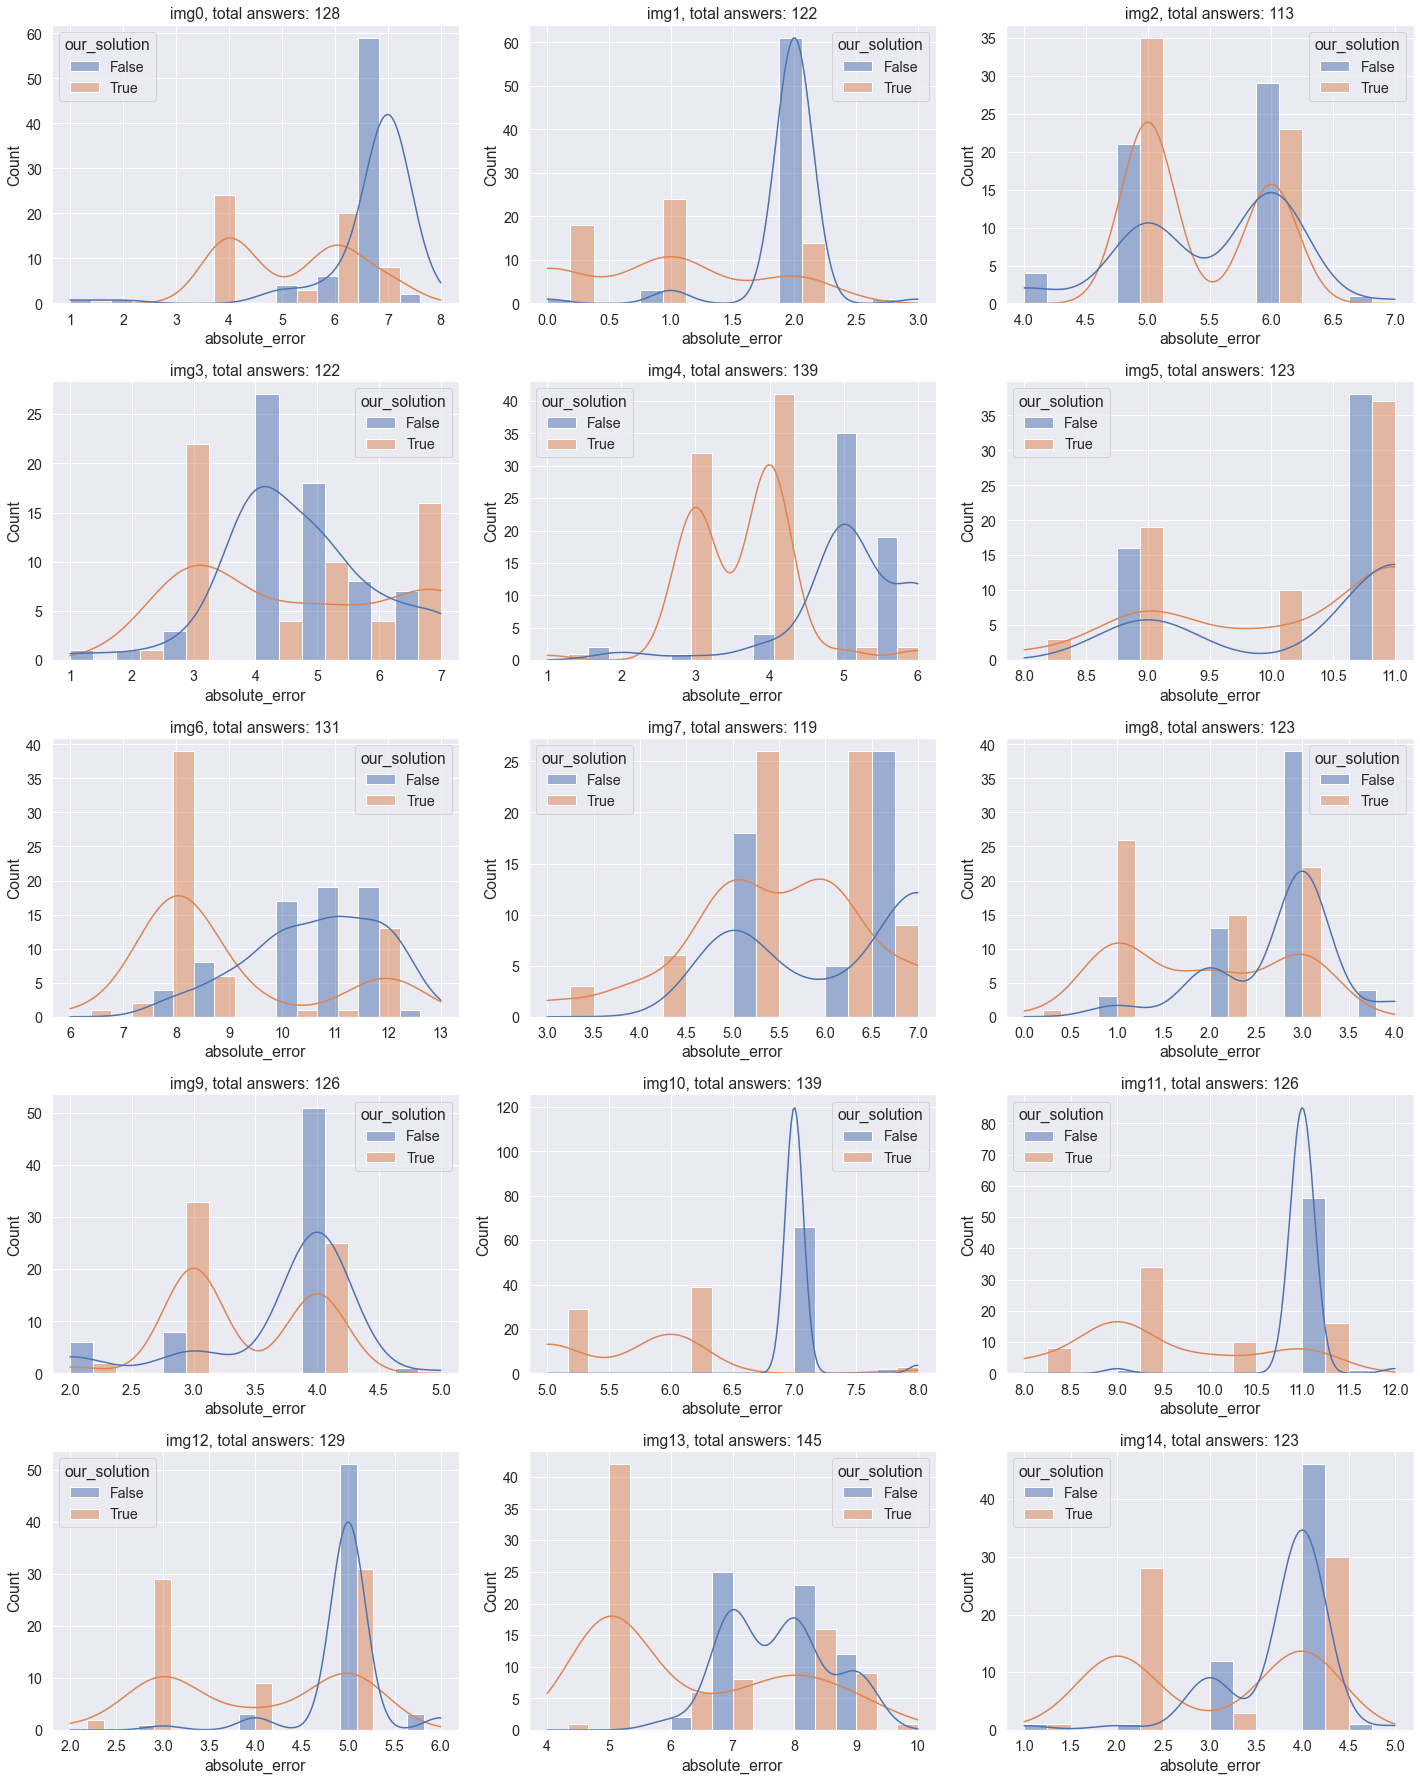

In [16]:
fig, axarr = plt.subplots(5, 3, figsize=(20, 25))
for i, picture in enumerate(f"img{i}" for i in range(15)):
    i, j = i // 3, i % 3
    data = df[df.picture == picture]
    title = f"{picture}, total answers: {len(data)}"
    sns.histplot(data=data, x='absolute_error', hue='our_solution', kde=True, multiple='dodge', ax=axarr[i, j]).set_title(title)
plt.tight_layout()

In [17]:
original_df = df[df.our_solution == False]
our_df = df[df.our_solution == True]

print(f"Original images: mean={original_df.absolute_error.mean():.3f}, std={original_df.absolute_error.std():.3f}")
print(f"Our images: mean={our_df.absolute_error.mean():.3f}, std={our_df.absolute_error.std():.3f}")

Original images: mean=6.113, std=2.834
Our images: mean=5.298, std=2.784


In [18]:
for i, picture in enumerate(f"img{i}" for i in range(15)):
    data = df[df.picture == picture]
    original_data = data[data.our_solution == False]
    our_data = data[data.our_solution == True]
    print(f"{picture} & {original_data.absolute_error.mean():.3f} & {original_data.absolute_error.std():.3f} & {our_data.absolute_error.mean():.3f} & {our_data.absolute_error.std():.3f} \\\\")

img0 & 6.685 & 1.039 & 5.218 & 1.166 \\
img1 & 1.939 & 0.345 & 0.929 & 0.759 \\
img2 & 5.491 & 0.663 & 5.397 & 0.493 \\
img3 & 4.723 & 1.218 & 4.737 & 1.717 \\
img4 & 5.115 & 0.858 & 3.628 & 0.723 \\
img5 & 10.407 & 0.922 & 10.174 & 0.985 \\
img6 & 10.647 & 1.219 & 8.937 & 1.693 \\
img7 & 6.163 & 0.943 & 5.457 & 0.973 \\
img8 & 2.746 & 0.659 & 1.906 & 0.904 \\
img9 & 3.712 & 0.651 & 3.383 & 0.555 \\
img10 & 7.029 & 0.170 & 5.676 & 0.692 \\
img11 & 10.983 & 0.296 & 9.500 & 0.985 \\
img12 & 4.966 & 0.417 & 3.972 & 0.985 \\
img13 & 7.726 & 0.813 & 6.325 & 1.586 \\
img14 & 3.738 & 0.603 & 3.000 & 1.008 \\


In [19]:
len(set(df.user))

30